In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
# Data Cleaning
# Eda
# Text preprocessing
# model Building
# Evaluation


# Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# deop last three columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Renaming columns
data.rename(columns={'v1': 'target','v2': 'text'},inplace =True)

In [10]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder=LabelEncoder()

In [13]:
data['target']=encoder.fit_transform(data['target'])

In [14]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
#missing value
data.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# Remove duplicates
data.duplicated().sum()

403

In [17]:
data=data.drop_duplicates(keep='first')

In [18]:
data.duplicated().sum()

0

In [19]:
data.shape

(5169, 2)

# EDA

In [20]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

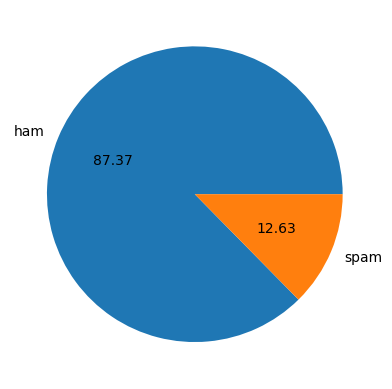

In [23]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [24]:
# that  mean  data is  imbalanced

In [25]:
# now we want to know how many characters,words,and sentences are used in our text


In [26]:
import nltk

In [27]:

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ubaid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
# create  a column  called  num of  characters in the sms
data['num of characters in the sms'] = data['text'].apply(len)

C:\Users\Ubaid\AppData\Local\Temp\ipykernel_13916\3282954542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num of characters in the sms'] = data['text'].apply(len)


In [29]:
data.head()

,target,text,num of characters in the sms
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# create  2nd column callen  num of words
data['num of words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Ubaid\AppData\Local\Temp\ipykernel_13916\2950775914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num of words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [31]:
data.head()

,target,text,num of characters in the sms,num of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
# create 3rd column  called  num of sentences
data['num of sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Ubaid\AppData\Local\Temp\ipykernel_13916\2450435531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num of sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [33]:
data.head()

,target,text,num of characters in the sms,num of words,num of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
# apply describe function on these new columns  to check what is  happening
data[['num of characters in the sms','num of words','num of sentences']].describe()

,num of characters in the sms,num of words,num of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham
data[data['target']==0][['num of characters in the sms','num of words','num of sentences']].describe()

,num of characters in the sms,num of words,num of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# spam
data[data['target']==1][['num of characters in the sms','num of words','num of sentences']].describe()

,num of characters in the sms,num of words,num of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num of characters in the sms', ylabel='Count'>

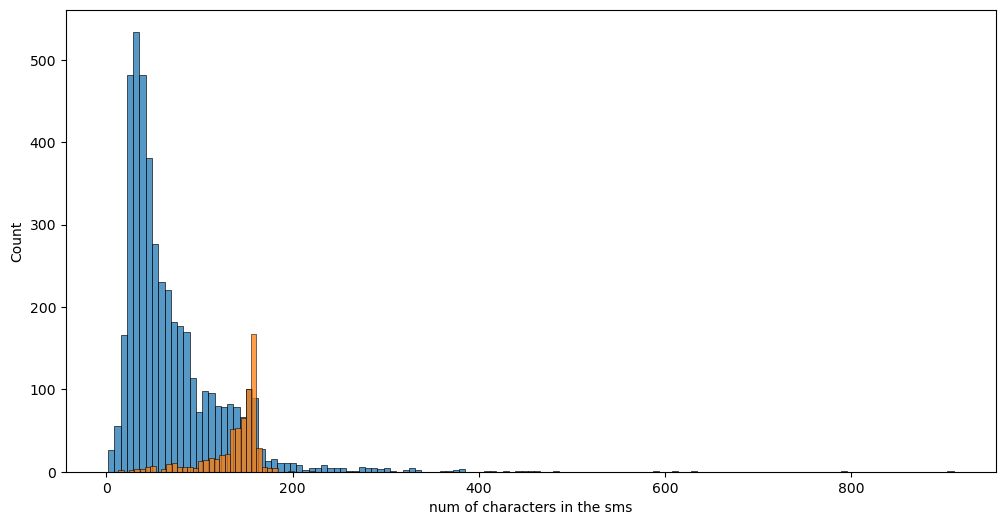

In [37]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num of characters in the sms'])
sns.histplot(data[data['target']==1]['num of characters in the sms'])

<Axes: xlabel='num of words', ylabel='Count'>

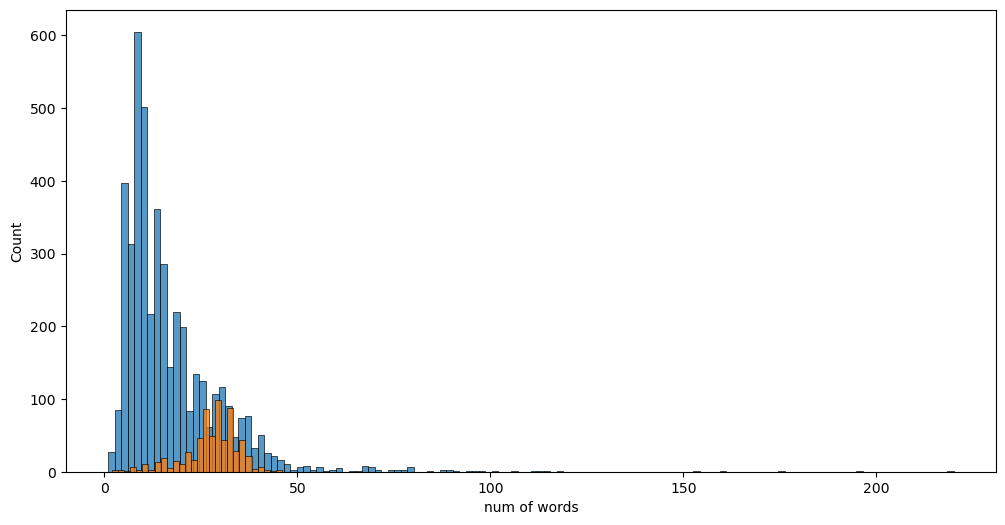

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num of words'])
sns.histplot(data[data['target']==1]['num of words'])

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ubaid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data preprocessing
.lower case
.Tokenization
.Removing special character
.Remove stop words and punctuation
.Stemming


In [40]:
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

nltk.download('punkt')

def transform_text(text):
    text = str(text).lower()
    tokens = nltk.word_tokenize(text)
    clean_tokens = []

    for token in tokens:
        # Remove any character that is not a-z or 0-9
        token = re.sub(r'[^a-z0-9]', '', token)
        if token:
            clean_tokens.append(token)

    clean_text=clean_tokens[:]
    clean_tokens.clear()

    for i in clean_text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            clean_tokens.append(i)

    new_text=clean_tokens[:]
    clean_tokens.clear()

    for i in new_text:
        clean_tokens.append(ps.stem(i))

    
    
    return " ".join(clean_tokens)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ubaid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
transform_text('i loved the youtube on machine learning how about you and your brother')

'love youtub machin learn brother'

In [42]:

ps.stem('dancing')

'danc'

In [43]:
 data['text_transformed'] =data['text'].apply(transform_text)

C:\Users\Ubaid\AppData\Local\Temp\ipykernel_13916\1935716888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_transformed'] =data['text'].apply(transform_text)


In [44]:
data.head()

,target,text,num of characters in the sms,num of words,num of sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [45]:
from wordcloud import WordCloud
# it is used to see which words appear most frequently in your text data

In [46]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [47]:
# Ensure all values are strings and filter spam messages
spam_text = wc.generate(data[data['target'] == 1]['text_transformed'].astype(str).str.cat(sep=" "))


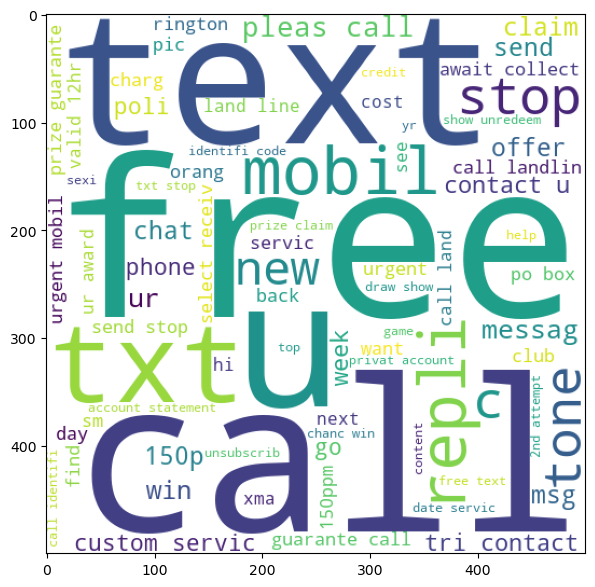

In [48]:
plt.figure(figsize=(15,7))
plt.imshow(spam_text)

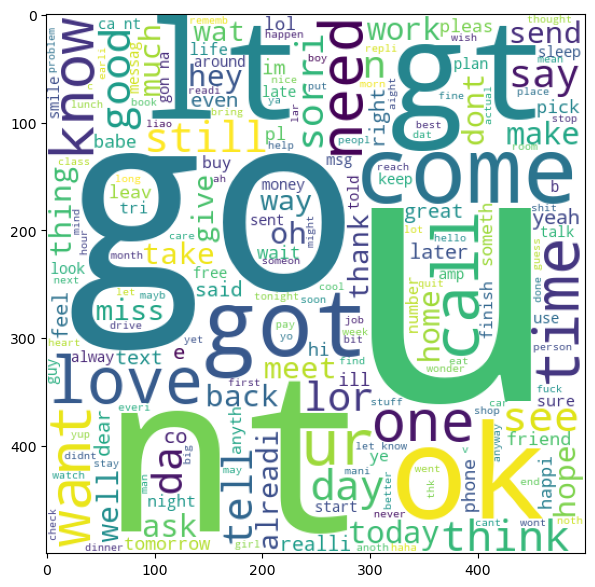

In [49]:
ham_text = wc.generate(data[data['target'] == 0]['text_transformed'].astype(str).str.cat(sep=" "))
plt.figure(figsize=(15,7))
plt.imshow(ham_text)

# Model Building

In [50]:
data.head()

,target,text,num of characters in the sms,num of words,num of sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [52]:
cv=CountVectorizer()
Tfdif=TfidfVectorizer()


In [53]:
X=Tfdif.fit_transform(data['text_transformed'])

In [54]:
X

<5169x7564 sparse matrix of type '<class 'numpy.float64'>'
	with 42536 stored elements in Compressed Sparse Row format>

In [55]:
X=Tfdif.fit_transform(data['text_transformed']).toarray()

In [56]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
X.shape

(5169, 7564)

In [58]:
Y=data['target'].values

In [59]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
GNB=GaussianNB()
MNB=MultinomialNB()
BNB= BernoulliNB()

In [64]:
GNB.fit(x_train,y_train)
y_predict=GNB.predict(x_test)


In [65]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict) )     
      

0.8810444874274661
[[795 101]
 [ 22 116]]
0.5345622119815668


In [72]:
MNB.fit(x_train,y_train)
y_predict2=MNB.predict(x_test)
new_text = ["I loved the youtube on machine learning"]
new_text_transformed = Tfdif.transform(new_text)
prediction=MNB.predict(new_text_transformed)
prediction

array([0])

In [73]:
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2) ) 

0.9584139264990329
[[896   0]
 [ 43  95]]
1.0


In [74]:
BNB.fit(x_train,y_train)
y_predict3=BNB.predict(x_test)

In [75]:
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3) ) 

0.9738878143133463
[[893   3]
 [ 24 114]]
0.9743589743589743


In [76]:
# ✅ Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC   # ✅ Import SVM

# ✅ Create model objects
log_reg = LogisticRegression(solver='liblinear', penalty='l1')
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
extra = ExtraTreesClassifier()
svm = SVC(kernel='linear', probability=True)   # ✅ SVM added


In [77]:
# ✅ Dictionary of classifiers
models = {
    "LR": log_reg,
    "DT": dt,
    "KNN": knn,
    "RF": rf,
    "ADA": ada,
    "BAG": bag,
    "EXT": extra,
    "SVM": svm
}


In [78]:
def train_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")  # "weighted" handles multi-class
    return acc, prec






In [79]:
results = []

for name, clf in models.items():   # iterate over  models dict
    acc, prec = train_classifier(clf, x_train, x_test, y_train, y_test)
    results.append({
        "algorithm": name,
        "accuracy": acc,
        "precision": prec
    })

# Convert to DataFrame
performance_data = pd.DataFrame(results)

    

    

C:\Users\Ubaid\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [80]:
performance_data

,algorithm,accuracy,precision
0,LR,0.950677,0.950206
1,DT,0.957447,0.956772
2,KNN,0.897485,0.908330
3,RF,0.973888,0.974356
4,ADA,0.963250,0.962775
5,BAG,0.960348,0.959313
6,EXT,0.975822,0.975984
7,SVM,0.973888,0.973899


In [83]:
import pickle
pickle.dump(Tfdif,open('vectorizer.pkl','wb'))
pickle.dump(MNB,open('model.pkl','wb'))